# Force-200: Results (max_iter=1)

In [1]:
# import libraries
import numpy as np
import pandas as pd
import json

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.gridspec as gridspec
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno as msno

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Data Pre-processing

In [2]:
# force train dataset
train = pd.read_csv(filepath_or_buffer='force_train.csv', sep=';')

# force test dataset
test = pd.read_csv(filepath_or_buffer='force_test.csv', sep=';')


In [3]:
# rename columns
train.rename(columns={'WELL': 'WELL_ID', 
                      'DEPTH_MD': 'DEPTH',
                      'X_LOC' : 'X',
                      'Y_LOC': 'Y', 
                      'GROUP': 'STRAT'
                     }, inplace=True
            )

test.rename(columns={'WELL': 'WELL_ID', 
                     'DEPTH_MD': 'DEPTH',
                     'X_LOC' : 'X',
                     'Y_LOC': 'Y', 
                     'GROUP': 'STRAT'
                    }, inplace=True
               )

In [4]:
# drop columns
train.drop(['Z_LOC', 'CALI', 'SGR', 'BS', 'ROP', 
            'DCAL', 'MUDWEIGHT', 'RMIC','ROPA', 'RXO', 
            'FORCE_2020_LITHOFACIES_LITHOLOGY',
            'FORCE_2020_LITHOFACIES_CONFIDENCE'], axis=1, inplace=True)

test.drop(['Z_LOC', 'CALI', 'SGR', 'BS', 'ROP', 
            'DCAL', 'MUDWEIGHT', 'RMIC','ROPA', 'RXO', 
            'FORCE_2020_LITHOFACIES_LITHOLOGY',
            'FORCE_2020_LITHOFACIES_CONFIDENCE'], axis=1, inplace=True)

In [5]:
# create a new column to store log base 10 of resistivity
# train
train['RD10'] = np.log10(train['RDEP']+1)
train['RM10'] = np.log10(train['RMED']+1)
train['RS10'] = np.log10(train['RSHA']+1)

# test
test['RD10'] = np.log10(test['RDEP']+1)
test['RM10'] = np.log10(test['RMED']+1)
test['RS10'] = np.log10(test['RSHA']+1)

In [6]:
# label encoding for well id
well_encoder = LabelEncoder()
well_encoder.fit(pd.concat([train, test]).WELL_ID.replace(np.nan, ''))

train['WELL'] = well_encoder.transform(train.WELL_ID.replace(np.nan, ''))
train['WELL'] = train['WELL'].astype(int)

test['WELL'] = well_encoder.transform(test.WELL_ID.replace(np.nan, ''))
test['WELL'] = test['WELL'].astype(int)


In [7]:
# feature selection
selected_features = ['WELL', 'X_LOC', 'Y_LOC', 'DEPTH',
                     'RHOB', 'GR', 'DTC', 'DTS',
                     'RD10', 'RM10', 'RS10',
                     'SP', 'NPHI','PEF',
                     'STRAT_ENCODED']

## 2. Results

### Test

In [8]:
# results from mice
test_result_knr = pd.read_csv('test_result_knr.csv').add_suffix('_KNR')
test_result_br = pd.read_csv('test_result_br.csv').add_suffix('_BR')
test_result_rf = pd.read_csv('test_result_rf.csv').add_suffix('_RF')
test_result_xgb = pd.read_csv('test_result_xgb.csv').add_suffix('_XGB')

In [9]:
test_df = test.copy()
test_df.reset_index(drop=True, inplace=True)

# merge mice results with the test data
test_df = test_df.merge(test_result_knr, left_index=True, right_index=True)
test_df = test_df.merge(test_result_br, left_index=True, right_index=True)
test_df = test_df.merge(test_result_rf, left_index=True, right_index=True)
test_df = test_df.merge(test_result_xgb, left_index=True, right_index=True)

In [10]:
test_df

,WELL_ID,DEPTH,X,Y,STRAT,FORMATION,RSHA,RMED,RDEP,RHOB,...,NPHI_IMP_SCALED_XGB,RHOB_IMP_XGB,GR_IMP_XGB,DTC_IMP_XGB,DTS_IMP_XGB,RD10_IMP_XGB,RM10_IMP_XGB,RS10_IMP_XGB,SP_IMP_XGB,NPHI_IMP_XGB
0,15/9-23,1518.2800,433906.7500,6460000.5,HORDALAND GP.,Skade Fm.,NaN,NaN,0.878615,NaN,...,0.618003,2.085651,50.840990,150.470362,430.713608,0.335162,0.263470,NaN,NaN,0.604054
1,15/9-23,1518.4320,433906.7500,6460000.5,HORDALAND GP.,Skade Fm.,NaN,NaN,0.874237,NaN,...,0.604728,2.023606,55.877436,150.687779,415.438280,0.330350,0.264695,NaN,NaN,0.590308
2,15/9-23,1518.5840,433906.7500,6460000.5,HORDALAND GP.,Skade Fm.,NaN,NaN,0.869858,NaN,...,0.604562,2.023544,55.877436,150.800850,417.952229,0.329975,0.264695,NaN,NaN,0.590136
3,15/9-23,1518.7360,433906.7500,6460000.5,HORDALAND GP.,Skade Fm.,NaN,NaN,0.865479,NaN,...,0.582765,2.060745,55.877436,150.301218,420.393154,0.326984,0.272178,NaN,NaN,0.567568
4,15/9-23,1518.8880,433906.7500,6460000.5,HORDALAND GP.,Skade Fm.,NaN,0.849849,0.863804,NaN,...,0.586858,2.147460,51.885052,133.890242,406.073595,0.288971,0.280469,NaN,NaN,0.571806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122392,35/9-7,2973.2988,536096.0625,6793022.0,BAAT GP.,Etive Fm.,NaN,2.820439,3.158570,NaN,...,0.223462,2.539881,70.186867,82.755700,132.959494,0.587756,0.632944,NaN,NaN,0.195548
122393,35/9-7,2973.4508,536096.0625,6793022.0,BAAT GP.,Etive Fm.,NaN,3.020778,3.332977,NaN,...,0.226577,2.546318,70.417148,83.251834,132.199398,0.614827,0.649358,NaN,NaN,0.198773
122394,35/9-7,2973.6028,536096.0625,6793022.0,BAAT GP.,Etive Fm.,NaN,2.795711,3.044179,NaN,...,0.231354,2.544343,68.218617,85.166197,130.141606,0.583768,0.628680,NaN,NaN,0.203720
122395,35/9-7,2973.7548,536096.0625,6793022.0,BAAT GP.,Etive Fm.,NaN,2.658694,2.847681,NaN,...,0.209182,2.544343,67.864393,83.272957,130.982941,0.560627,0.606989,NaN,NaN,0.180763


### 3.1. MICE Performance

In [11]:
well_logs = ['RHOB', 'GR', 'DTC', 'DTS', 
             'RD10', 'RM10', 'RS10', 
             'SP', 'NPHI']

models = ['KNR', 'BR', 'RF', 'XGB']

evaluation_results = {}
for log in well_logs:
    
    evaluation_results[log] = {}
    for model in models:

        column_name = f'{log}_{model}'
        
        original_values = test_df[f'{log}_SCALED_{model}'].dropna()
        original_index = list(original_values.index.values)
        imputed_values = test_df.loc[original_index, f'{log}_IMP_SCALED_{model}']
        
        mae = mean_absolute_error(original_values, imputed_values)
        mse = mean_squared_error(original_values, imputed_values)
        r2 = r2_score(original_values, imputed_values)
        
        evaluation_results[log][model] = {'R2': r2, 'MAE': mae, 'MSE': mse}

evaluation_results_df = {}
for log, models in evaluation_results.items():
    
    table_data = []
    for model, metrics in models.items():
        cols = {'Model': model, 'R2': metrics['R2'], 'MAE': metrics['MAE'], 'MSE': metrics['MSE']}
        table_data.append(cols)
    
    df = pd.DataFrame(table_data)
    
    evaluation_results_df[log] = df

for log, df in evaluation_results_df.items():
    print(f'Well-log: {log}')
    display(df.round(4).sort_values('MSE', ascending=True))
    print('\n')

Well-log: RHOB


,Model,R2,MAE,MSE
3,XGB,0.7304,0.0293,0.0018
2,RF,0.6388,0.0342,0.0024
0,KNR,0.6111,0.0354,0.0026
1,BR,0.5204,0.0429,0.0032




Well-log: GR


,Model,R2,MAE,MSE
3,XGB,0.2612,0.0220,0.0008
2,RF,0.1458,0.0234,0.0009
1,BR,-0.0913,0.0264,0.0012
0,KNR,-0.3628,0.0293,0.0015




Well-log: DTC


,Model,R2,MAE,MSE
3,XGB,0.8896,0.0216,0.0010
2,RF,0.8684,0.0229,0.0012
1,BR,0.7957,0.0308,0.0019
0,KNR,0.6821,0.0332,0.0029




Well-log: DTS


,Model,R2,MAE,MSE
1,BR,0.8527,0.0430,0.0035
3,XGB,0.8395,0.0402,0.0038
2,RF,0.7772,0.0448,0.0052
0,KNR,0.7011,0.0524,0.0070




Well-log: RD10


,Model,R2,MAE,MSE
2,RF,0.9175,0.0210,0.0022
3,XGB,0.8882,0.0273,0.0030
0,KNR,0.3632,0.0515,0.0171
1,BR,0.2277,0.0537,0.0207




Well-log: RM10


,Model,R2,MAE,MSE
2,RF,0.8677,0.0138,0.0008
3,XGB,0.8463,0.0144,0.0010
1,BR,0.8069,0.0192,0.0012
0,KNR,0.7773,0.0237,0.0014




Well-log: RS10


,Model,R2,MAE,MSE
2,RF,0.5130,0.0414,0.0088
0,KNR,0.4808,0.0453,0.0094
1,BR,0.4547,0.0438,0.0099
3,XGB,0.4203,0.0440,0.0105




Well-log: SP


,Model,R2,MAE,MSE
1,BR,-0.3140,0.0416,0.0031
2,RF,-0.3882,0.0413,0.0033
0,KNR,-0.5259,0.0438,0.0036
3,XGB,-0.6747,0.0454,0.0039




Well-log: NPHI


,Model,R2,MAE,MSE
1,BR,0.6856,0.0530,0.0047
3,XGB,0.5816,0.0558,0.0062
2,RF,0.5434,0.0562,0.0068
0,KNR,0.4655,0.0642,0.0079


In [12]:
r2_results_df = pd.DataFrame()
mae_results_df = pd.DataFrame()
mse_results_df = pd.DataFrame()

for log, df in evaluation_results_df.items():
    r2_results_df[log] = df['R2']
    mae_results_df[log] = df['MAE']
    mse_results_df[log] = df['MSE']

r2_results_df.index = df['Model']
mae_results_df.index = df['Model']
mse_results_df.index = df['Model']


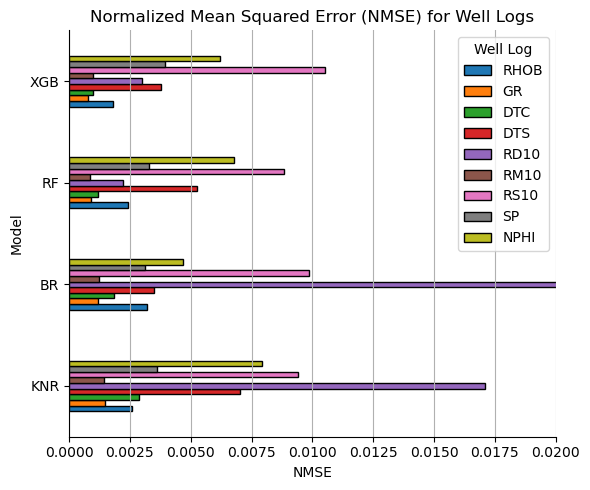

Model,KNR,BR,RF,XGB
RHOB,0.0026,0.0032,0.0024,0.0018
GR,0.0015,0.0012,0.0009,0.0008
DTC,0.0029,0.0019,0.0012,0.0010
DTS,0.0070,0.0035,0.0052,0.0038
RD10,0.0171,0.0207,0.0022,0.0030
RM10,0.0014,0.0012,0.0008,0.0010
RS10,0.0094,0.0099,0.0088,0.0105
SP,0.0036,0.0031,0.0033,0.0039
NPHI,0.0079,0.0047,0.0068,0.0062


In [17]:

ax = mse_results_df.plot(kind='barh', figsize=(6, 5), edgecolor='black')

plt.title('Normalized Mean Squared Error (NMSE) for Well Logs')
plt.ylabel('Model')
plt.xlabel('NMSE')

plt.xticks(rotation='horizontal')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.grid(True)
ax.legend(title='Well Log', bbox_to_anchor=(1, 1))

ax.set_xlim([0, 0.02])

plt.tight_layout() 
plt.show()

display(mse_results_df.T.round(4))


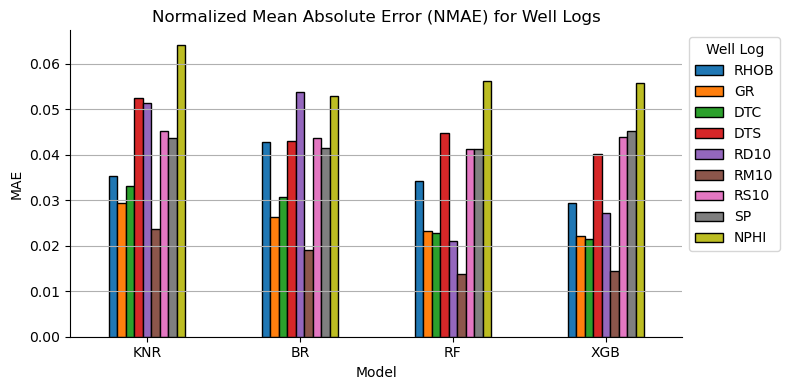

Model,KNR,BR,RF,XGB
RHOB,0.0354,0.0429,0.0342,0.0293
GR,0.0293,0.0264,0.0234,0.0220
DTC,0.0332,0.0308,0.0229,0.0216
DTS,0.0524,0.0430,0.0448,0.0402
RD10,0.0515,0.0537,0.0210,0.0273
RM10,0.0237,0.0192,0.0138,0.0144
RS10,0.0453,0.0438,0.0414,0.0440
SP,0.0438,0.0416,0.0413,0.0454
NPHI,0.0642,0.0530,0.0562,0.0558


In [14]:
ax = mae_results_df.plot(kind='bar', figsize=(8, 4), edgecolor='black')

plt.title('Normalized Mean Absolute Error (NMAE) for Well Logs')
plt.xlabel('Model')
plt.ylabel('MAE')

plt.xticks(rotation='horizontal')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.grid(True)
ax.legend(title='Well Log', bbox_to_anchor=(1, 1))

plt.tight_layout() 
plt.show()

# ax.set_ylim([0, 0.1])

display(mae_results_df.T.round(4))


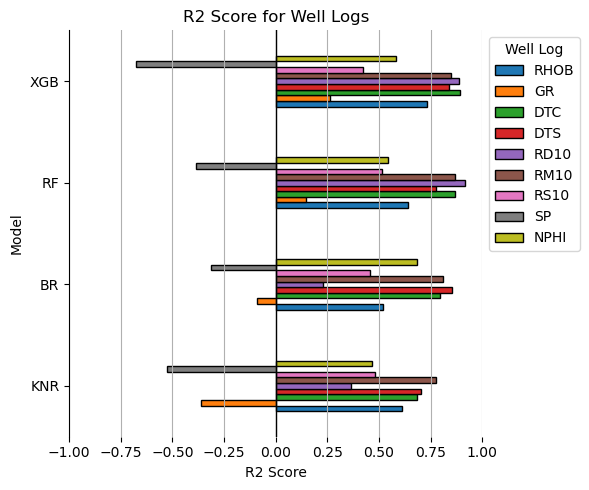

Model,KNR,BR,RF,XGB
RHOB,0.61,0.52,0.64,0.73
GR,-0.36,-0.09,0.15,0.26
DTC,0.68,0.80,0.87,0.89
DTS,0.70,0.85,0.78,0.84
RD10,0.36,0.23,0.92,0.89
RM10,0.78,0.81,0.87,0.85
RS10,0.48,0.45,0.51,0.42
SP,-0.53,-0.31,-0.39,-0.67
NPHI,0.47,0.69,0.54,0.58


In [22]:
ax = r2_results_df.plot(kind='barh', figsize=(6, 5), edgecolor='black')

plt.title('R2 Score for Well Logs')
plt.ylabel('Model')
plt.xlabel('R2 Score')
ax.legend(title='Well Log', bbox_to_anchor=(1, 1))
plt.xticks(rotation='horizontal')
plt.axvline(0, color='black', linewidth=1)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.xaxis.grid(True)

ax.set_xlim([-1, 1])

plt.tight_layout()  
plt.show()
display(r2_results_df.T.round(2))
